# Complete End to End Pipeline for Classification

In [85]:
#Pandas
import pandas as pd
#Numpy
import numpy as np

#Column Transfomrer -> Transform Various Columns/FEatures
from sklearn.compose import ColumnTransformer
#Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
#Imputer -> Fills the Missing Values
from sklearn.impute import SimpleImputer, KNNImputer
#Feature Scaling
from sklearn.preprocessing import RobustScaler, OneHotEncoder
#Model
from sklearn.tree import DecisionTreeClassifier
#Train Test Split, Grid Search/Randomized Search
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

# Read the data

In [40]:
df = pd.read_csv("train_titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [42]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- `survival`	Survival	0 = No, 1 = Yes
- `pclass`	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- `sex`	Sex	
- `Age`	Age in years	
- `sibsp`	# of siblings / spouses aboard the Titanic	
- `parch`	# of parents / children aboard the Titanic	
- `ticket`	Ticket number	
- `fare`	Passenger fare	
- `cabin`	Cabin number	
- `embarked`	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

# Exploratory Data Analysis

# Feature Engineering

In [43]:
df['family_size'] = df['Parch'] + df['SibSp']
#df.drop(['Parch', 'SibSp'], axis=1, inplace=True)
df['is_alone'] = 1
df.loc[df['family_size'] > 1,'is_alone'] = 0

In [46]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size,is_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1,1


# Feature Selection

In [47]:
features = ['Embarked','Sex','Pclass','is_alone','Age','Fare','family_size']

# Train - Test Split
- Fit the Model on Train Set
- Evaluate the Model on Test Set

In [49]:
X_train, X_test, y_train, y_test = train_test_split(\
    df[features],\
    df['Survived'],\
    test_size=0.33, random_state=42)

In [50]:
df.shape,X_train.shape,X_test.shape

((891, 14), (596, 7), (295, 7))

# Pipeline
- Feature Transformation
- Model 

## Feature Transform/Column Transform

Two main types of columns/features
- Numeric [Age,Fare,Salary]
- Categorical [Sex, Tier, Class]

### Select the categorical Features
- Imputation: Mitigates Missing Values
- One Hot Encoding

Actual Data<br>
|Embarked|
|---|
|S|
|C|
|S|
|Q|

One Hot Encoded<br>
|S|C|Q|
|---|---|---|
|1|0|0|
|0|1|0|
|1|0|0|
|0|0|1|

In [65]:
df["Embarked"].isna().sum()

2

In [53]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

- Imputation - Replace the missing values with most frequently occuring value
- One hot encoding -

In [54]:
#First describe the categorical columns
cat_cols = ['Embarked', 'Sex', 'Pclass', 'is_alone']

#Categorical Data Transformation pipeline


cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy="most_frequent")),
('onehot', OneHotEncoder(handle_unknown='ignore',))])

In [70]:
cat_cols = ['Embarked', 'Sex', 'Pclass', 'is_alone']
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore',))
])

In [55]:
cat_transformer#[0]

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [66]:
cat_transformer.fit_transform(df[["Embarked"]])

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [67]:
df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [64]:
df["Embarked"].isna().sum()

2

In [68]:
pd.DataFrame(cat_transformer.fit_transform(df[["Embarked"]]).toarray()).head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [69]:
pd.DataFrame(cat_transformer.fit_transform(df[["Embarked"]]).toarray()).isna().sum()

0    0
1    0
2    0
dtype: int64

### Select the Numerical Features

In [71]:
features

['Embarked', 'Sex', 'Pclass', 'is_alone', 'Age', 'Fare', 'family_size']

In [72]:
#First select the Numerical Features
num_cols = ['Age', 'Fare', 'family_size']

#Pipeline for Numerical transformation
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

<Axes: ylabel='Frequency'>

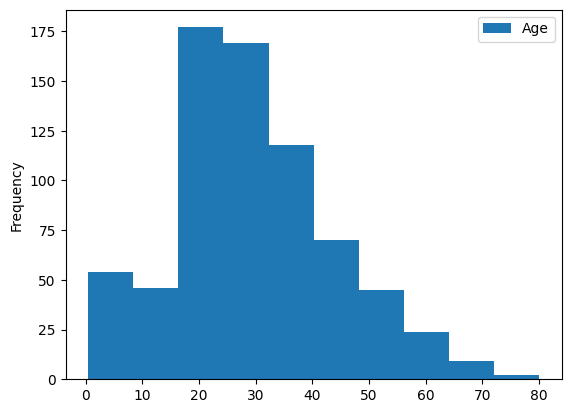

In [75]:
df[["Age"]].plot(kind="hist")

MinMaxScaler()


<Axes: ylabel='Frequency'>

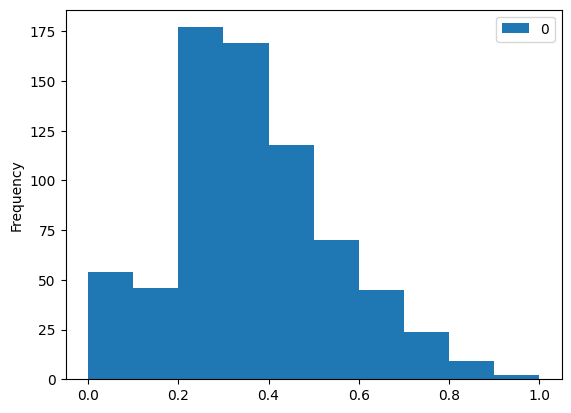

In [77]:
from sklearn.preprocessing import MinMaxScaler
data = df[["Age"]]
scaler = MinMaxScaler()
print(scaler.fit(data))
pd.DataFrame(scaler.transform(data)).plot(kind="hist")


RobustScaler()


<Axes: ylabel='Frequency'>

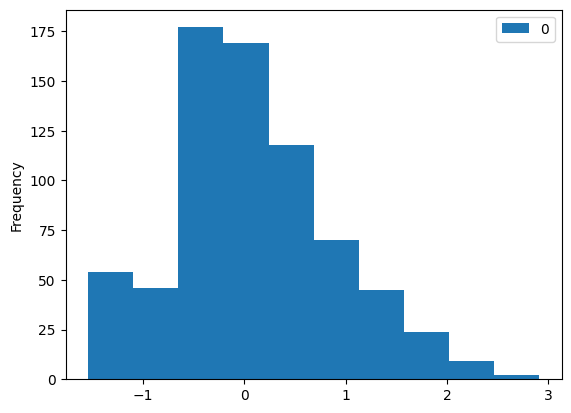

In [78]:
from sklearn.preprocessing import MinMaxScaler
data = df[["Age"]]
scaler = RobustScaler()
print(scaler.fit(data))
pd.DataFrame(scaler.transform(data)).plot(kind="hist")


In [73]:
num_transformer

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

## Column Transform Pipeline

In [79]:
num_cols

['Age', 'Fare', 'family_size']

In [80]:
num_transformer

Pipeline(steps=[('imputer', KNNImputer()), ('scaler', RobustScaler())])

In [81]:
cat_cols

['Embarked', 'Sex', 'Pclass', 'is_alone']

In [82]:
cat_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

### Define Pre processing pipeline
It tells how to handle Numerical and Categorical values

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

In [83]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scaler', RobustScaler())]),
                                 ['Age', 'Fare', 'family_size']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Embarked', 'Sex', 'Pclass', 'is_alone'])])

In [109]:
clf = Pipeline(
    steps=[
        ('preprocessor',preprocessor),
        ('classifier',DecisionTreeClassifier())
    ]
)
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare',
                                                   'family_size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex', 'Pclass',
                                                   'is_alone'])])),
                ('classifier', DecisionTreeClassifier())])

# Training of the Pipeline

In [110]:
clf.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare',
                                                   'family_size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex', 'Pclass',
                                                   'is_alone'])])),
                ('classifier', DecisionTreeClassifier())])

In [111]:
cross_val_score(clf, X_train, y_train, cv=5, scoring="accuracy").mean()

0.7550420168067227

|max_depth|acc|
|---|---|
|3|0.78|
|4|0.78|
|5|0.79|
|6|0.8|

# Predictions and Eval on training Data(Not recommended)

In [95]:

predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       374
           1       1.00      0.95      0.97       222

    accuracy                           0.98       596
   macro avg       0.98      0.97      0.98       596
weighted avg       0.98      0.98      0.98       596



# Predictions from Pipeline

In [90]:
predictions = clf.predict(X_test)
predictions

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0])

# Classification Report Evalaution

In [91]:

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       175
           1       0.71      0.71      0.71       120

    accuracy                           0.77       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295



In [93]:

print(confusion_matrix(y_test, predictions))

[[141  34]
 [ 35  85]]


# Difference between Training and Evaluation
- Fit on `X_train` and `y_train` (Fitting always on Training Data)
- Evaluate on `X_test` and `y_test` (Evaluating on Test Data)

# Hyper-parameter Tuning
- Grid Search
- Random Search
- Manually by Data Scientist

In [112]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['Age', 'Fare',
                                                   'family_size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex', 'Pclass',
                                                   'is_alone'])])),
                ('classifier', DecisionTreeClassifier())])

In [114]:
help(KNNImputer)

Help on class KNNImputer in module sklearn.impute._knn:

class KNNImputer(sklearn.impute._base._BaseImputer)
 |  KNNImputer(*, missing_values=nan, n_neighbors=5, weights='uniform', metric='nan_euclidean', copy=True, add_indicator=False, keep_empty_features=False)
 |  
 |  Imputation for completing missing values using k-Nearest Neighbors.
 |  
 |  Each sample's missing values are imputed using the mean value from
 |  `n_neighbors` nearest neighbors found in the training set. Two samples are
 |  close if the features that neither is missing are close.
 |  
 |  Read more in the :ref:`User Guide <knnimpute>`.
 |  
 |  .. versionadded:: 0.22
 |  
 |  Parameters
 |  ----------
 |  missing_values : int, float, str, np.nan or None, default=np.nan
 |      The placeholder for the missing values. All occurrences of
 |      `missing_values` will be imputed. For pandas' dataframes with
 |      nullable integer dtypes with missing values, `missing_values`
 |      should be set to np.nan, since `pd.

In [113]:
list(range(2, 15))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [ ]:
"preprocessor__num__imputer__n_neighbors"

In [115]:
list(range(5,10))

[5, 6, 7, 8, 9]

## Random Search

In [117]:
# Hyper parameter ranges for Numerical KNN Imputer
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        }

# Hyper parameter for Categorical Imputation
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        }

#Hyper paramter for classifer
dtree_dist = {'classifier__max_depth': list(range(5,10)),
                      }

param_dist = {**num_transformer_dist, **cat_transformer_dist, **dtree_dist}

random_search = RandomizedSearchCV(clf,
                                   param_distributions=param_dist,
                                   n_iter=100)

In [118]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'family_size']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Embarked',
                                                                                'Sex',
                                                                                'Pclass',
                                                                                'is_alone'])])),
                                             ('classifier',
                                              DecisionTreeClassifier())]),
                   n_iter=100,
                   param_distributions={'classifier__max_depth': [5, 6, 7, 8,
                                                                  9],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__num__imputer__n_neighbors': [2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    7,
                                                                                    8,
                                                                                    9,
                                                                                    10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14]})

In [119]:
random_search.best_params_

{'preprocessor__num__imputer__n_neighbors': 12,
 'preprocessor__cat__imputer__strategy': 'constant',
 'classifier__max_depth': 6}

In [120]:
random_search

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                KNNImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               ['Age',
                                                                                'Fare',
                                                                                'family_size']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Embarked',
                                                                                'Sex',
                                                                                'Pclass',
                                                                                'is_alone'])])),
                                             ('classifier',
                                              DecisionTreeClassifier())]),
                   n_iter=100,
                   param_distributions={'classifier__max_depth': [5, 6, 7, 8,
                                                                  9],
                                        'preprocessor__cat__imputer__strategy': ['most_frequent',
                                                                                 'constant'],
                                        'preprocessor__num__imputer__n_neighbors': [2,
                                                                                    3,
                                                                                    4,
                                                                                    5,
                                                                                    6,
                                                                                    7,
                                                                                    8,
                                                                                    9,
                                                                                    10,
                                                                                    11,
                                                                                    12,
                                                                                    13,
                                                                                    14]})

# Best Predictions

In [121]:
best_predictions = random_search.predict(X_test)

In [123]:

print(classification_report(y_test, best_predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       175
           1       0.83      0.65      0.73       120

    accuracy                           0.80       295
   macro avg       0.81      0.78      0.79       295
weighted avg       0.81      0.80      0.80       295



# Model Persistence
Save a Model for Deployment

In [126]:
import pickle
s = pickle.dumps(clf)

In [129]:
import joblib
joblib.dump(clf, 'best_model.pkl') 

['best_model.pkl']